## WSU 

- CSC 5825 Intro To ML & Application

- Term Project - Acute Liver Failure

- Ashishkumar Patel (GV3010)

In [1]:
# Required Lobraries =================================================
import warnings; warnings.filterwarnings ('ignore')
import pandas as pd
import numpy as np

# Visualizations =====================================================
import seaborn as sns
from matplotlib import pyplot as plt


# Required libraries for pre-processing ==============================
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn import neighbors, metrics


# Algorithms ========================================================
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

# Score metrics =====================================================
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import precision_recall_curve

# Export Charts to PDF ==============================================
from matplotlib.backends.backend_pdf import PdfPages


%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)

In [2]:
# Import & Check Data =================================================
data = pd.read_excel (r'C:\Users\apatel20\Documents\WSU\Classes\CSC 5825 - Intoduction To ML & Applications - Fall 2019\Final Project\Data\ALF_Data.xlsx')
data.head()

,Age,Gender,Region,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,...,PoorVision,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue,ALF
0,65,M,east,56.0,162.1,21.31,0.0,83.6,135.0,71.0,...,0.0,1,0.0,0,0.0,1,1.0,0.0,0.0,0.0
1,36,M,south,60.2,162.2,22.88,0.0,76.6,96.0,52.0,...,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0
2,66,M,east,83.9,162.5,31.77,1.0,113.2,115.0,57.0,...,0.0,1,0.0,0,1.0,0,0.0,0.0,0.0,0.0
3,54,M,east,69.4,160.5,26.94,0.0,77.9,110.0,57.0,...,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0,0.0
4,63,M,north,73.1,159.2,28.84,0.0,89.3,132.0,73.0,...,0.0,0,1.0,0,0.0,0,0.0,0.0,0.0,0.0


In [3]:
# Check data values =========================================
print (data['ALF'].value_counts())
print (data.shape)
print (data.isnull().count())
print (data.info())

# We do not have 2785 target variable value in our dataset==

# Create dataframe to store all model data (metrics) =======
#ModelMetrics = pd.DataFrame (columns=['Model', 'Dataset', 'SampleSize', 'Accuracy %','Recall %', 'Precision %', 'F-1 Score'])

0.0    5536
1.0     464
Name: ALF, dtype: int64
(8785, 30)
Age                       8785
Gender                    8785
Region                    8785
Weight                    8785
Height                    8785
Body Mass Index           8785
Obesity                   8785
Waist                     8785
Maximum Blood Pressure    8785
Minimum Blood Pressure    8785
Good Cholesterol          8785
Bad Cholesterol           8785
Total Cholesterol         8785
Dyslipidemia              8785
PVD                       8785
Physical Activity         8785
Education                 8785
Unmarried                 8785
Income                    8785
Source of Care            8785
PoorVision                8785
Alcohol Consumption       8785
HyperTension              8785
Family  HyperTension      8785
Diabetes                  8785
Family Diabetes           8785
Hepatitis                 8785
Family Hepatitis          8785
Chronic Fatigue           8785
ALF                       8785
dtype: int6

# Data Transformation & high level analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EB2672D908>,
      dtype=object)

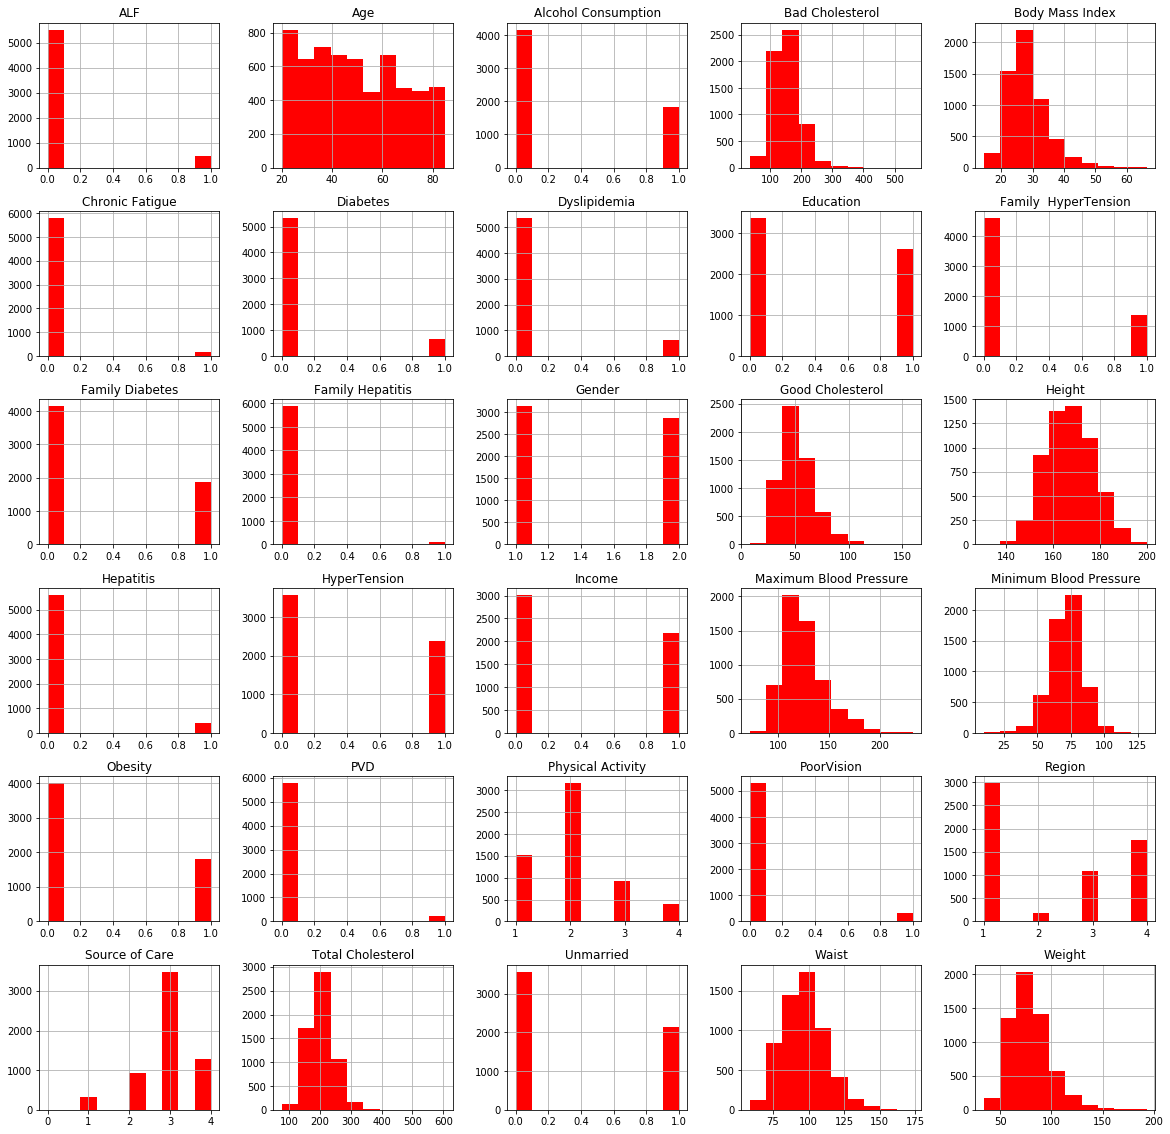

In [14]:
# Transform categorical data into numeric data for Gender, region, Source of Care
# Gender >> 1 = Male , 2 = Female
# Region >> 1 = East, 2 = West 3 = North 4 = South
# Source of Care >> Governament Hospital = 1, Never Counsulted = 2, Private Hospital = 3, clinic = 4

data = data.replace('M', 1).replace('F', 2).replace ('east', 1).replace ('west', 2).replace ('north', 3).replace ('south', 4)
data = data.replace('Governament Hospital', 1).replace('Never Counsulted',2).replace('Private Hospital',3).replace('clinic', 4).replace (''' ''', 0 )

# By looking at data description we dont need column Source of Care which is source of care while they conducted survey
#data = data.drop('Source of Care', axis = 1)

# Drop data which has ALF = null to balance data & check data balance again
newData = data.dropna(axis=0, subset = ['ALF']) # Dropping ratget variable with null values

# Check Data Distribution
plt.rcParams['figure.figsize'] = (20, 20)
newData.hist(color = "red")

# Data Balance

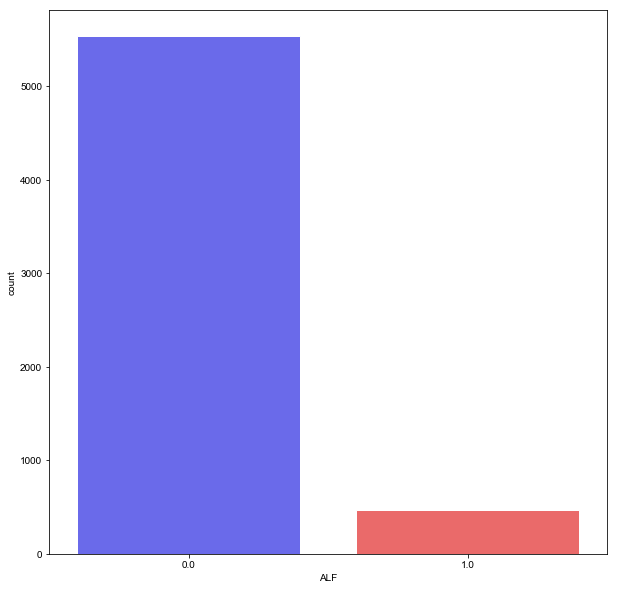

In [15]:
plt.rcParams['figure.figsize'] = (10, 10)
fig, ax = plt.subplots()
sns.set_style ('whitegrid')
sns.countplot (x = 'ALF', data = newData, palette='seismic' )
fig.savefig('DataBalance.pdf')

# Observation of graph we can see there is more records which shows no ALF vs less ALF

# Data Pre-processing & Feature Selection

Age                       0.367639
HyperTension              0.232705
Maximum Blood Pressure    0.216645
Hepatitis                 0.214971
PVD                       0.168850
Chronic Fatigue           0.162796
Diabetes                  0.155641
PoorVision                0.100678
Alcohol Consumption       0.067631
Unmarried                 0.063628
Waist                     0.060799
Family Hepatitis          0.056097
Source of Care            0.050488
Bad Cholesterol           0.033539
Total Cholesterol         0.021847
Family Diabetes           0.017326
Obesity                   0.008785
Body Mass Index           0.004539
Dyslipidemia              0.001812
Gender                   -0.014440
Weight                   -0.019161
Good Cholesterol         -0.031826
Family  HyperTension     -0.045650
Height                   -0.050380
Education                -0.059445
Minimum Blood Pressure   -0.087266
Income                   -0.092472
Region                   -0.102710
Physical Activity   

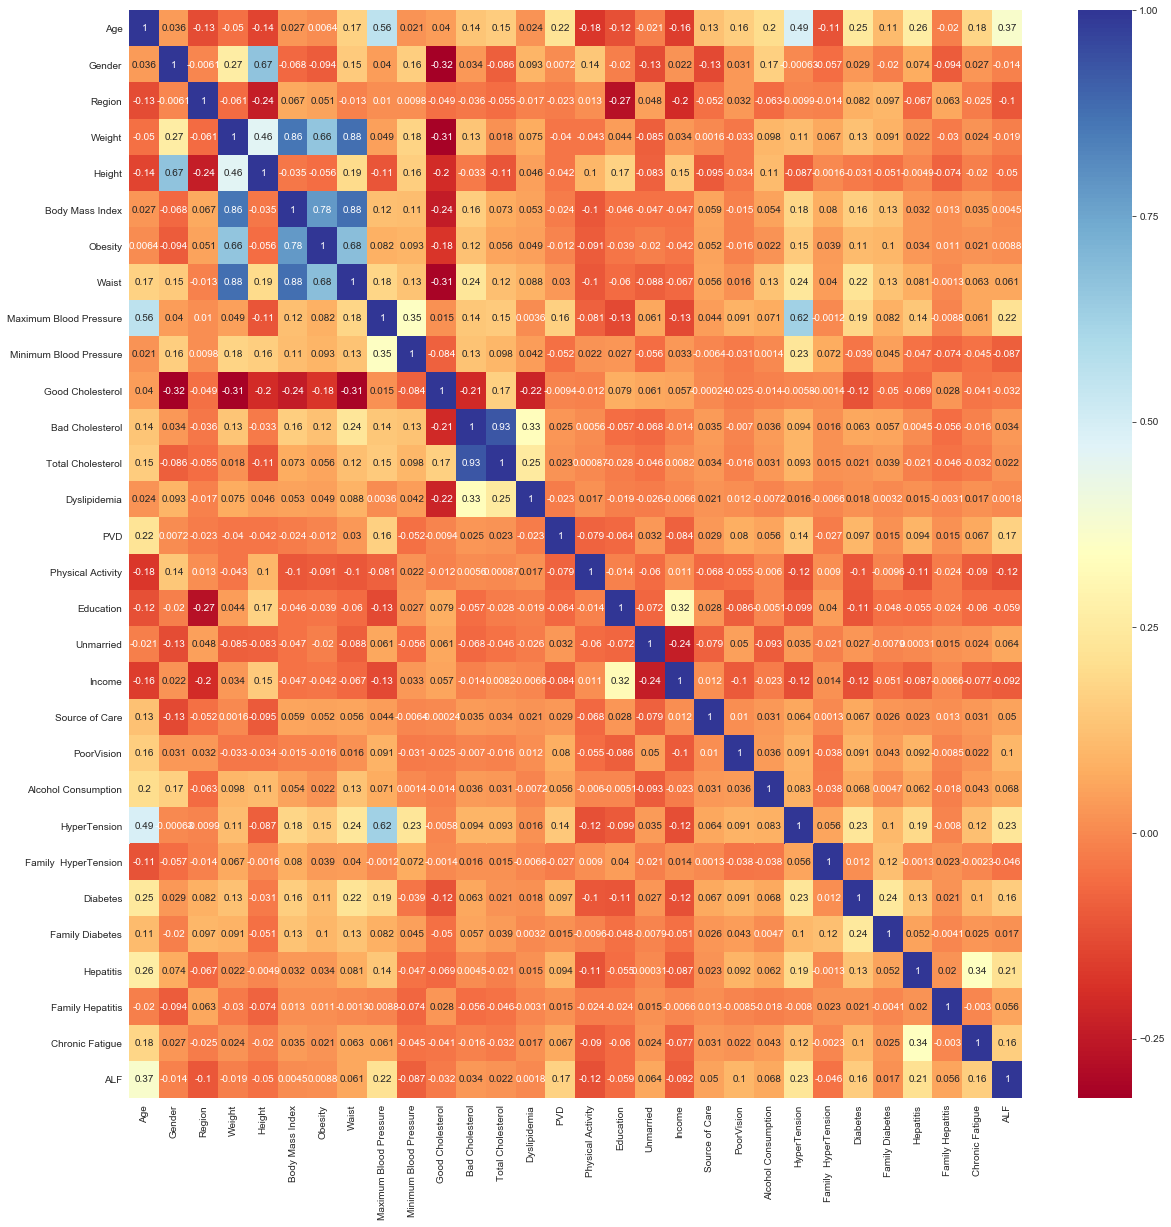

In [16]:
# Check Data correaltion for feature selection
corr = newData.corr()
topCorrFeatures = corr.index

# Plot heat Map
plt.rcParams['figure.figsize'] = (20, 20)
fig, ax = plt.subplots()
corrMap = sns.heatmap (newData[topCorrFeatures].corr(), annot=True, cmap='RdYlBu')
fig.savefig('CorrealtionMatrix.pdf')
#PdfPages(r'C:\Users\apatel20\Documents\WSU\Classes\CSC 5825 - Intoduction To ML & Applications - Fall 2019\Final Project\Data\HeatMap.pdf').savefig()

# Lets short correlation values 
features = newData[topCorrFeatures].corr()
correlationFactors = features.iloc[29,0:29]
print(correlationFactors.sort_values(ascending=False))


# Co-relation Analysis
 - Age has highest correlation with ALF, followed by HyperTension, BP, Hepatitis. etc and that is little make sense
 - Physical Activity has lowest correlation with ALF
 - Obesity and cholesterol metric has really less correlation
 - Interesting fact is Source of Care has positive realtion with ALF - Its good point to observe in data set

# Replace missing value with Mean for required columns

In [17]:
# Replace Null with mean values for required columns =================================================
# Make list of columns which is part of feature & replace Null with mean =============================
columnList = ['Age','Weight','Height','Body Mass Index', 'Obesity','Waist'
             ,'Maximum Blood Pressure', 'Minimum Blood Pressure','Good Cholesterol', 'Bad Cholesterol'
             ,'Total Cholesterol','Dyslipidemia', 'PVD','Income','Physical Activity'
             ,'Education','Unmarried','Income','PoorVision', 'HyperTension', 'Diabetes', 'Hepatitis','Family Hepatitis', 'Chronic Fatigue'
             ]

# Create funcction Replace null with mean
for values in columnList:
    newData[values].fillna(newData[values].mean(),inplace=True)

# Check Null values
print (newData.isnull().sum())

Age                       0
Gender                    0
Region                    0
Weight                    0
Height                    0
Body Mass Index           0
Obesity                   0
Waist                     0
Maximum Blood Pressure    0
Minimum Blood Pressure    0
Good Cholesterol          0
Bad Cholesterol           0
Total Cholesterol         0
Dyslipidemia              0
PVD                       0
Physical Activity         0
Education                 0
Unmarried                 0
Income                    0
Source of Care            0
PoorVision                0
Alcohol Consumption       0
HyperTension              0
Family  HyperTension      0
Diabetes                  0
Family Diabetes           0
Hepatitis                 0
Family Hepatitis          0
Chronic Fatigue           0
ALF                       0
dtype: int64


# Assign X & Y and Scale Data, create Train, Validation and Test Data.

In [18]:
# Split data set into Train (0.7), Test (0.2), Validation(0.1)
TrainData = newData.sample (frac = 0.7)
TestData = newData.sample (frac = 0.2)
ValidationData = newData.sample (frac = 0.1)

print(TrainData.shape)
print(TestData.shape)
print(ValidationData.shape)

(4200, 30)
(1200, 30)
(600, 30)


In [ ]:
# Set Train X & Y ===========================================
y = newData['ALF']
X = newData.drop(['ALF'], axis = 1) # we can drop 'Source of Care','Region' also 

# Standardize data only features not label
X = StandardScaler().fit_transform(X)

# Set Train X & Y ===========================================
y_train = TrainData['ALF']
x_train = TrainData.drop(['ALF'], axis = 1)

# Standardize data only features not label
x_train = StandardScaler().fit_transform(x_train)

# Set Test X & Y ============================================
y_test = TestData['ALF']
x_test = TestData.drop(['ALF'], axis = 1)

# Standardize data only features not label
x_test = StandardScaler().fit_transform(x_test)

# Set Validation X & Y ======================================
y_val = ValidationData['ALF']
x_val = ValidationData.drop(['ALF'], axis = 1)

# Standardize data only features not label
x_val = StandardScaler().fit_transform(x_val)

# KNN

In [ ]:
# KNN with Full Data set
knnScore = []
for k in range (1, 21):
    knnClassifier = neighbors.KNeighborsClassifier (n_neighbors=k)
    accuracyScore = cross_val_score (knnClassifier, X, y, cv = 10)
    knnScore.append(accuracyScore.mean())
    
knnScore = np.round(knnScore, 4) * 100

In [ ]:
# Plot curve with different K values and run model at best K Value.

plt.rcParams['figure.figsize'] = (15, 15)
fig, ax = plt.subplots()
plt.plot ([k for k in range (1, 21)], knnScore, color = 'red')

for i in range (1,21):
    plt.text (i, knnScore [i-1], (i, knnScore [i-1]))
    
plt.xticks ([i for i in range (1,21)])
plt.xlabel ('Number of Neighbours (K)')
plt.ylabel ('Scores')
plt.title  ('KNN scores for Different K-Values')

# Save graph in PDF
fig.savefig('KNNScore.PDF')

Train Model with Highest K value from above graph

In [ ]:
# KNN -  Train model & Check all model metrics =========================================

knn = neighbors.KNeighborsClassifier (n_neighbors = 14).fit(x_train, y_train)

# Test Data ============================================================================
predicted = knn.predict (x_test)

# Set values 
y_true = y_test
y_pred = predicted

# Confusion Metrics
print('KNN - Test Data Metrics')
print('Confusion Matrix')
print(confusion_matrix (y_true, y_pred))

# Accuracy Score  
accuracy = accuracy_score (y_true, y_pred)
print ('Accuracy Test Data %: ' , np.round ((accuracy * 100),2))

# Precision Score 
precision = precision_score (y_true, y_pred)
print ('Precision %: ', np.round(precision * 100 ,2))

# ReCall
recall = recall_score(y_true, y_pred)
print ('Recall %: ', np.round(recall * 100,2 ))

# F1-Score
F1Score =  np.round (2 * ((precision * recall) / (precision + recall)),3)
print('F-1 Score:' , F1Score)

# Classification Report
print('Test Data: Classification Report')
print(classification_report (y_true, y_pred))

# Update values in table for final metric comparison
ModelMetrics =  ModelMetrics.append ({'Model' : 'KNN'
                                             , 'Dataset': 'Test'
                                             , 'SampleSize': len(TestData)
                                             , 'Accuracy %': np.round (accuracy * 100,2)
                                             , 'Recall %'    : np.round (recall * 100, 2)
                                             , 'Precision %' : np.round (precision * 100, 2)
                                             , 'F-1 Score' : np.round (F1Score,3)
                                            }
                                            , ignore_index = True)




# Validation Data ============================================================================
predicted = knn.predict (x_val)

# Set values 
y_true = y_val
y_pred = predicted

# Confusion Metrics
print('KNN - Validation Data Metrics')
print('Confusion Matrix')
print(confusion_matrix (y_true, y_pred))

# Accuracy Score  
accuracy = accuracy_score (y_true, y_pred)
print ('Accuracy Validation Data %: ' , np.round ((accuracy * 100),2))

# Precision Score 
precision = precision_score (y_true, y_pred)
print ('Precision %: ', np.round(precision * 100 ,2))

# ReCall
recall = recall_score(y_true, y_pred)
print ('Recall %: ', np.round(recall * 100,2 ))

# F1-Score
F1Score =  np.round (2 * ((precision * recall) / (precision + recall)),3)
print('F-1 Score:' , F1Score)

# Classification Report
print('Validation Data: Classification Report')
print(classification_report (y_true, y_pred))


# Update values in table for final metric comparison
ModelMetrics =  ModelMetrics.append ({'Model' : 'KNN'
                                             , 'Dataset': 'Validation'
                                             , 'SampleSize': len(ValidationData)
                                             , 'Accuracy %': np.round (accuracy * 100,2)
                                             , 'Recall %'    : np.round (recall * 100, 2)
                                             , 'Precision %' : np.round (precision * 100, 2)
                                             , 'F-1 Score' : np.round (F1Score,3)
                                            }
                                            , ignore_index = True)

# Random Forest

In [ ]:
# Run random forest classifier with 20 % ====================================
rf = RandomForestClassifier (n_estimators=50) # Number of decison trees 
rf.fit(x_train, y_train)

#Predict ===================================================================
predicted = rf.predict(x_test)

# Set values 
y_true = y_test
y_pred = predicted

# Confusion Metrics
print('RF - Test Data Metrics')
print('Confusion Matrix')
print(confusion_matrix (y_true, y_pred))

# Accuracy Score  
accuracy = accuracy_score (y_true, y_pred)
print ('Accuracy Test Data %: ' , np.round ((accuracy * 100),2))

# Precision Score 
precision = precision_score (y_true, y_pred)
print ('Precision %: ', np.round(precision * 100 ,2))

# ReCall
recall = recall_score(y_true, y_pred)
print ('Recall %: ', np.round(recall * 100,2 ))

# F1-Score
F1Score =  np.round (2 * ((precision * recall) / (precision + recall)),3)
print('F-1 Score:' , F1Score)


# Classification Report
print('Test Data: Classification Report')
print(classification_report (y_true, y_pred))

# Update values in table for final metric comparison
ModelMetrics =  ModelMetrics.append ({'Model' : 'RandomForest'
                                             , 'Dataset': 'Test'
                                             , 'SampleSize': len(TestData)
                                             , 'Accuracy %': np.round (accuracy * 100,2)
                                             , 'Recall %'    : np.round (recall * 100, 2)
                                             , 'Precision %' : np.round (precision * 100, 2)
                                             , 'F-1 Score' : np.round (F1Score,3)
                                            }
                                            , ignore_index = True)


# Validation Data ==========================================================
predicted = knn.predict (x_val)

# Set values 
y_true = y_val
y_pred = predicted

# Confusion Metrics
print('RF - Validation Data Metrics')
print('Confusion Matrix')
print(confusion_matrix (y_true, y_pred))

# Accuracy Score  
accuracy = accuracy_score (y_true, y_pred)
print ('Accuracy Validation Data %: ' , np.round ((accuracy * 100),2))

# Precision Score 
precision = precision_score (y_true, y_pred)
print ('Precision %: ', np.round(precision * 100 ,2))

# ReCall
recall = recall_score(y_true, y_pred)
print ('Recall %: ', np.round(recall * 100,2 ))

# F1-Score
F1Score =  np.round (2 * ((precision * recall) / (precision + recall)),3)
print('F-1 Score:' , F1Score)

# Classification Report
print('Validation Data: Classification Report')
print(classification_report (y_true, y_pred))

# Update values in table for final metric comparison
ModelMetrics =  ModelMetrics.append ({'Model' : 'RandomForest'
                                             , 'Dataset': 'Validation'
                                             , 'SampleSize': len(ValidationData)
                                             , 'Accuracy %': np.round (accuracy * 100,2)
                                             , 'Recall %'    : np.round (recall * 100, 2)
                                             , 'Precision %' : np.round (precision * 100, 2)
                                             , 'F-1 Score' : np.round (F1Score,3)
                                            }
                                            , ignore_index = True)

# Naive Bayes

In [ ]:
BernNB = BernoulliNB (binarize= True)
BernNB.fit(x_train, y_train)

#Predict ===================================================================
predicted = BernNB.predict(x_test)

# Set values 
y_true = y_test
y_pred = predicted

# Confusion Metrics
print('NaiveBayes - Test Data Metrics')
print('Confusion Matrix')
print(confusion_matrix (y_true, y_pred))

# Accuracy Score  
accuracy = accuracy_score (y_true, y_pred)
print ('Accuracy Test Data %: ' , np.round ((accuracy * 100),2))

# Precision Score 
precision = precision_score (y_true, y_pred)
print ('Precision %: ', np.round(precision * 100 ,2))

# ReCall
recall = recall_score(y_true, y_pred)
print ('Recall %: ', np.round(recall * 100,2 ))

# F1-Score
F1Score =  np.round (2 * ((precision * recall) / (precision + recall)),3)
print('F-1 Score:' , F1Score)

# Classification Report
print('Test Data: Classification Report')
print(classification_report (y_true, y_pred))

# Update values in table for final metric comparison
ModelMetrics =  ModelMetrics.append ({'Model' : 'NaiveBayes'
                                             , 'Dataset': 'Test'
                                             , 'SampleSize': len(TestData)
                                             , 'Accuracy %': np.round (accuracy * 100,2)
                                             , 'Recall %'    : np.round (recall * 100, 2)
                                             , 'Precision %' : np.round (precision * 100, 2)
                                             , 'F-1 Score' : np.round (F1Score,3)
                                            }
                                            , ignore_index = True)


# Validation Data ==========================================================
predicted = knn.predict (x_val)

# Set values 
y_true = y_val
y_pred = predicted

# Confusion Metrics
print('NaiveBayes - Validation Data Metrics')
print('Confusion Matrix')
print(confusion_matrix (y_true, y_pred))

# Accuracy Score  
accuracy = accuracy_score (y_true, y_pred)
print ('Accuracy Validation Data %: ' , np.round ((accuracy * 100),2))

# Precision Score 
precision = precision_score (y_true, y_pred)
print ('Precision %: ', np.round(precision * 100 ,2))

# ReCall
recall = recall_score(y_true, y_pred)
print ('Recall %: ', np.round(recall * 100,2 ))

# F1-Score
F1Score =  np.round (2 * ((precision * recall) / (precision + recall)),3)
print('F-1 Score:' , F1Score)

# Classification Report
print('Validation Data: Classification Report')
print(classification_report (y_true, y_pred))

# Update values in table for final metric comparison
ModelMetrics =  ModelMetrics.append ({'Model' : 'NaiveBayes'
                                             , 'Dataset': 'Validation'
                                             , 'SampleSize': len(ValidationData)
                                             , 'Accuracy %': np.round (accuracy * 100,2)
                                             , 'Recall %'    : np.round (recall * 100, 2)
                                             , 'Precision %' : np.round (precision * 100, 2)
                                             , 'F-1 Score' : np.round (F1Score,3)
                                            }
                                            , ignore_index = True)

# Final Results - Metrics Comparison for all Models

In [ ]:
# Model Metrics Comparision ===================================
ModelMetrics

# Import Data to Excel for final report explanantion
#ModelMetrics.to_excel("FinalMetricsComparision.xlsx")

# Analysis & Conclusion 

- ALF is rare clinical syndrome but life-threatening disease.
- Young people affected mostly, we can derive from histogram also.
- Step performed to create model is Data Analysis, Data Cleaning, Feature selection.
- Total sample size is 8750 with 6000 accurate labels.
- So, we have to drop 2785 rows from our data set to balance our data.
- Train various model and do cross validation using Test & validation data
- Blood related disease is major contributor in Acute liver failure in human body. Hyper Tension, Systolic Blood pressure, Peripheral Vascular Disease are major contributors in ALF based on correlation matrix


# Model Metrics 

- Since we have labels available in our data, we going to perform supervised ML, we going to use KNN, Random forest and Naive Bayes
- Random Forest Outperforms KNN & Naive Bayes based on accuracy of 97.75 % and high precision and recall compared to other two model
- KNN has highest accuracy at K-14 
- Since this is medical data, we have to emphasis on precision and recall of the model 
- Random Forest is best fit to this data set since it has F score is almost close to 1
